# create group of mall customers based on their annual income and spending score

In [142]:
import pickle
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.metrics import *
sns.set()

In [143]:
dataframe = pd.read_csv('Data/Mall_Customers.csv')

In [144]:
dataframe.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


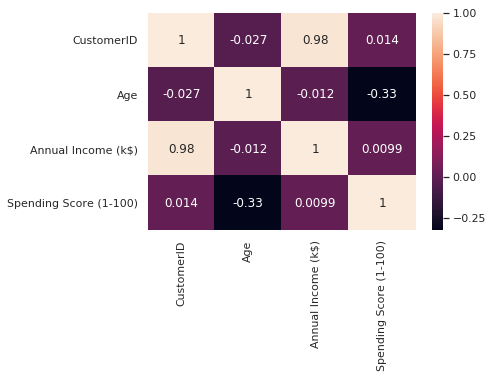

In [145]:
sns.heatmap(dataframe.corr(),annot=True)

In [146]:
# as question states group by Anunual income and Spending salary hence we'll select the same 2 columns here

In [147]:
X = dataframe.iloc[:,[3,4]]

In [148]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [149]:
wcss=[]

In [150]:
for i in range(1,11):
    km = KMeans(init='k-means++',n_jobs=10,n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

In [151]:
wcss

[269981.28,
 184102.15349264705,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.34361793659,
 25044.967764018926,
 21900.341350107527,
 19646.482018947238]

Text(0,0.5,'WCSS')

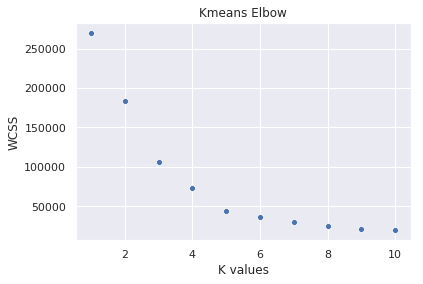

In [152]:
# Plotting the graph to find the best value  of K i.e number of clusters
sns.scatterplot(np.arange(1,11),wcss)
plt.title('Kmeans Elbow')
plt.xlabel('K values')
plt.ylabel('WCSS')

In [153]:
# as per the elbow printed above we see that the best value for k is 5
km = KMeans(init='k-means++',n_jobs=10,n_clusters=5)
# n_jobs is the number of CPUs to use to do the OVA (One Versus All, for multi-class problems) 
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [154]:
file = open('Data/Kmeans_clustering.pkl','wb')

In [155]:
pickle.dump(km,file)
file.close()